C:\Users\m1953\AppData\Local\Temp\ipykernel_15480\2126810119.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=substance_counts.index[:10], y=substance_counts.values[:10], palette="Blues_r")


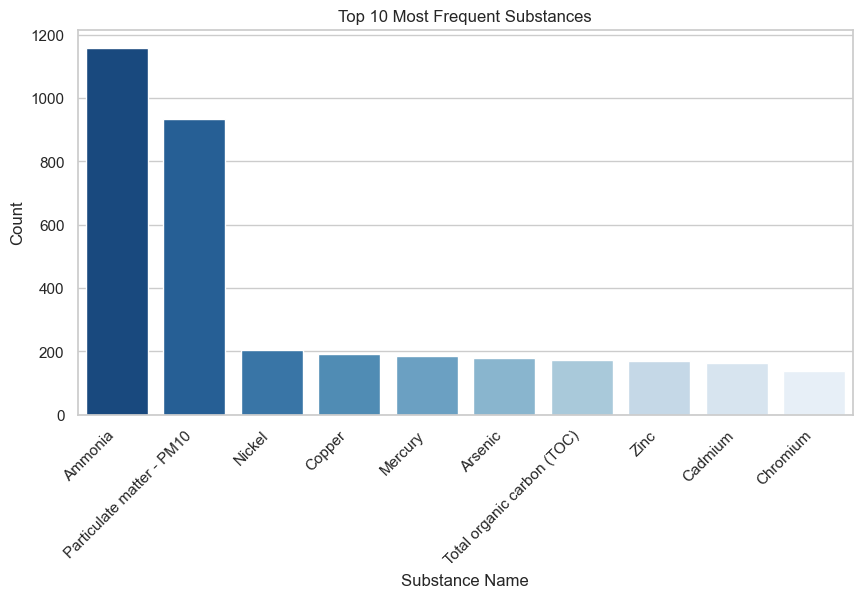

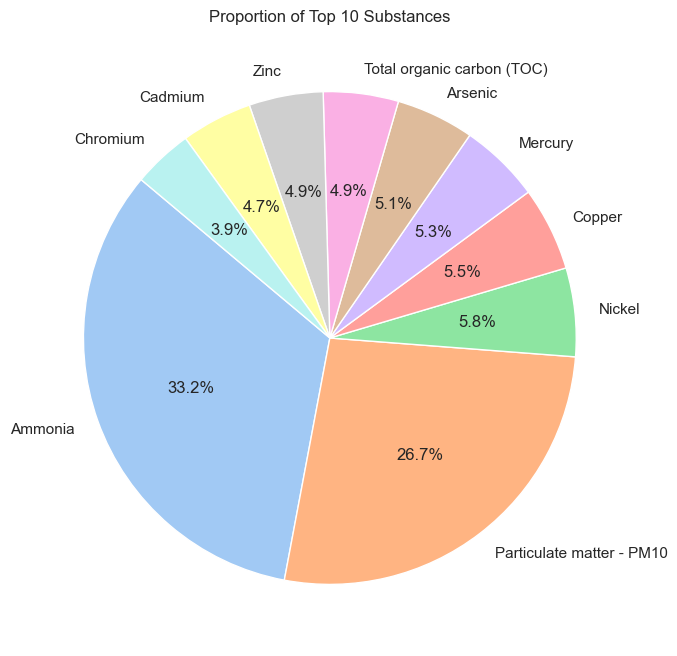

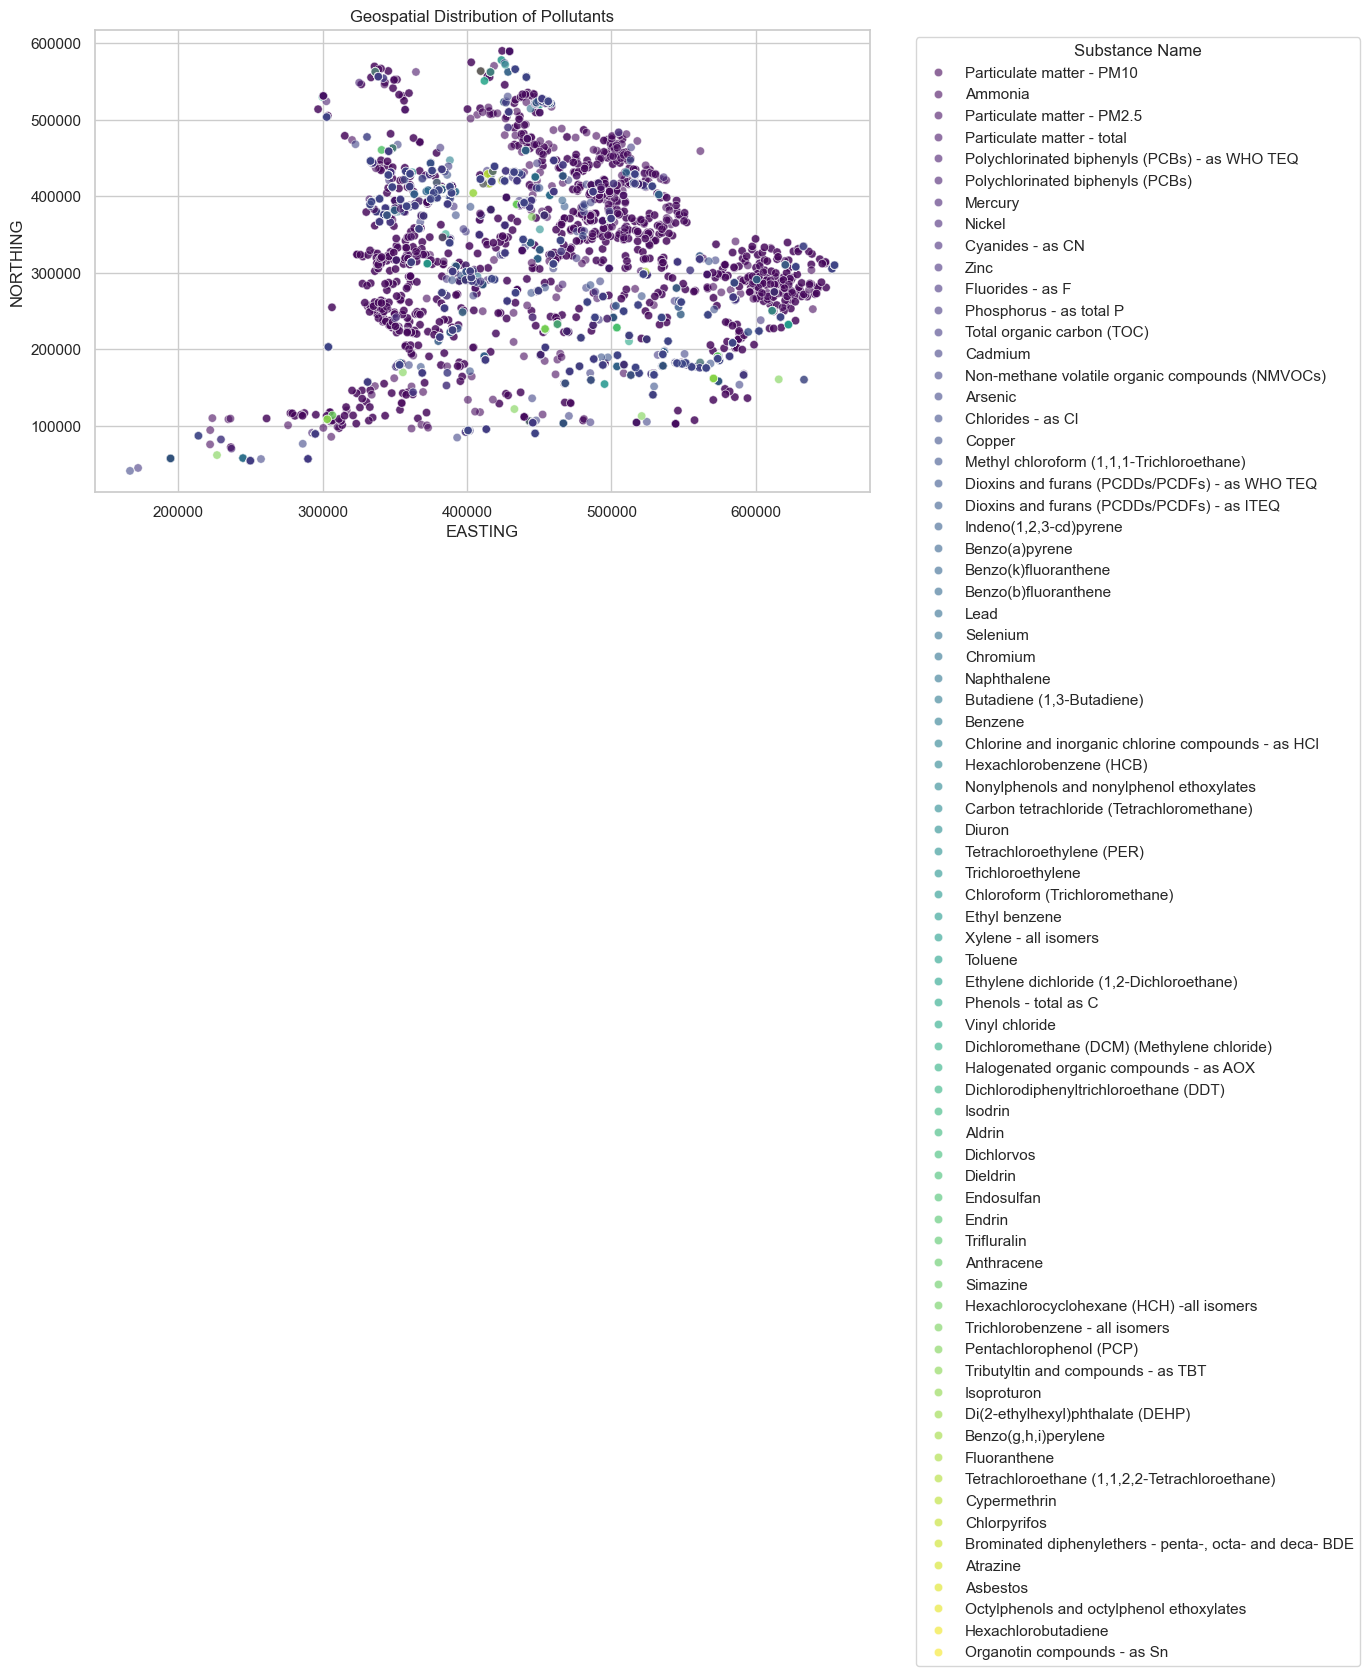

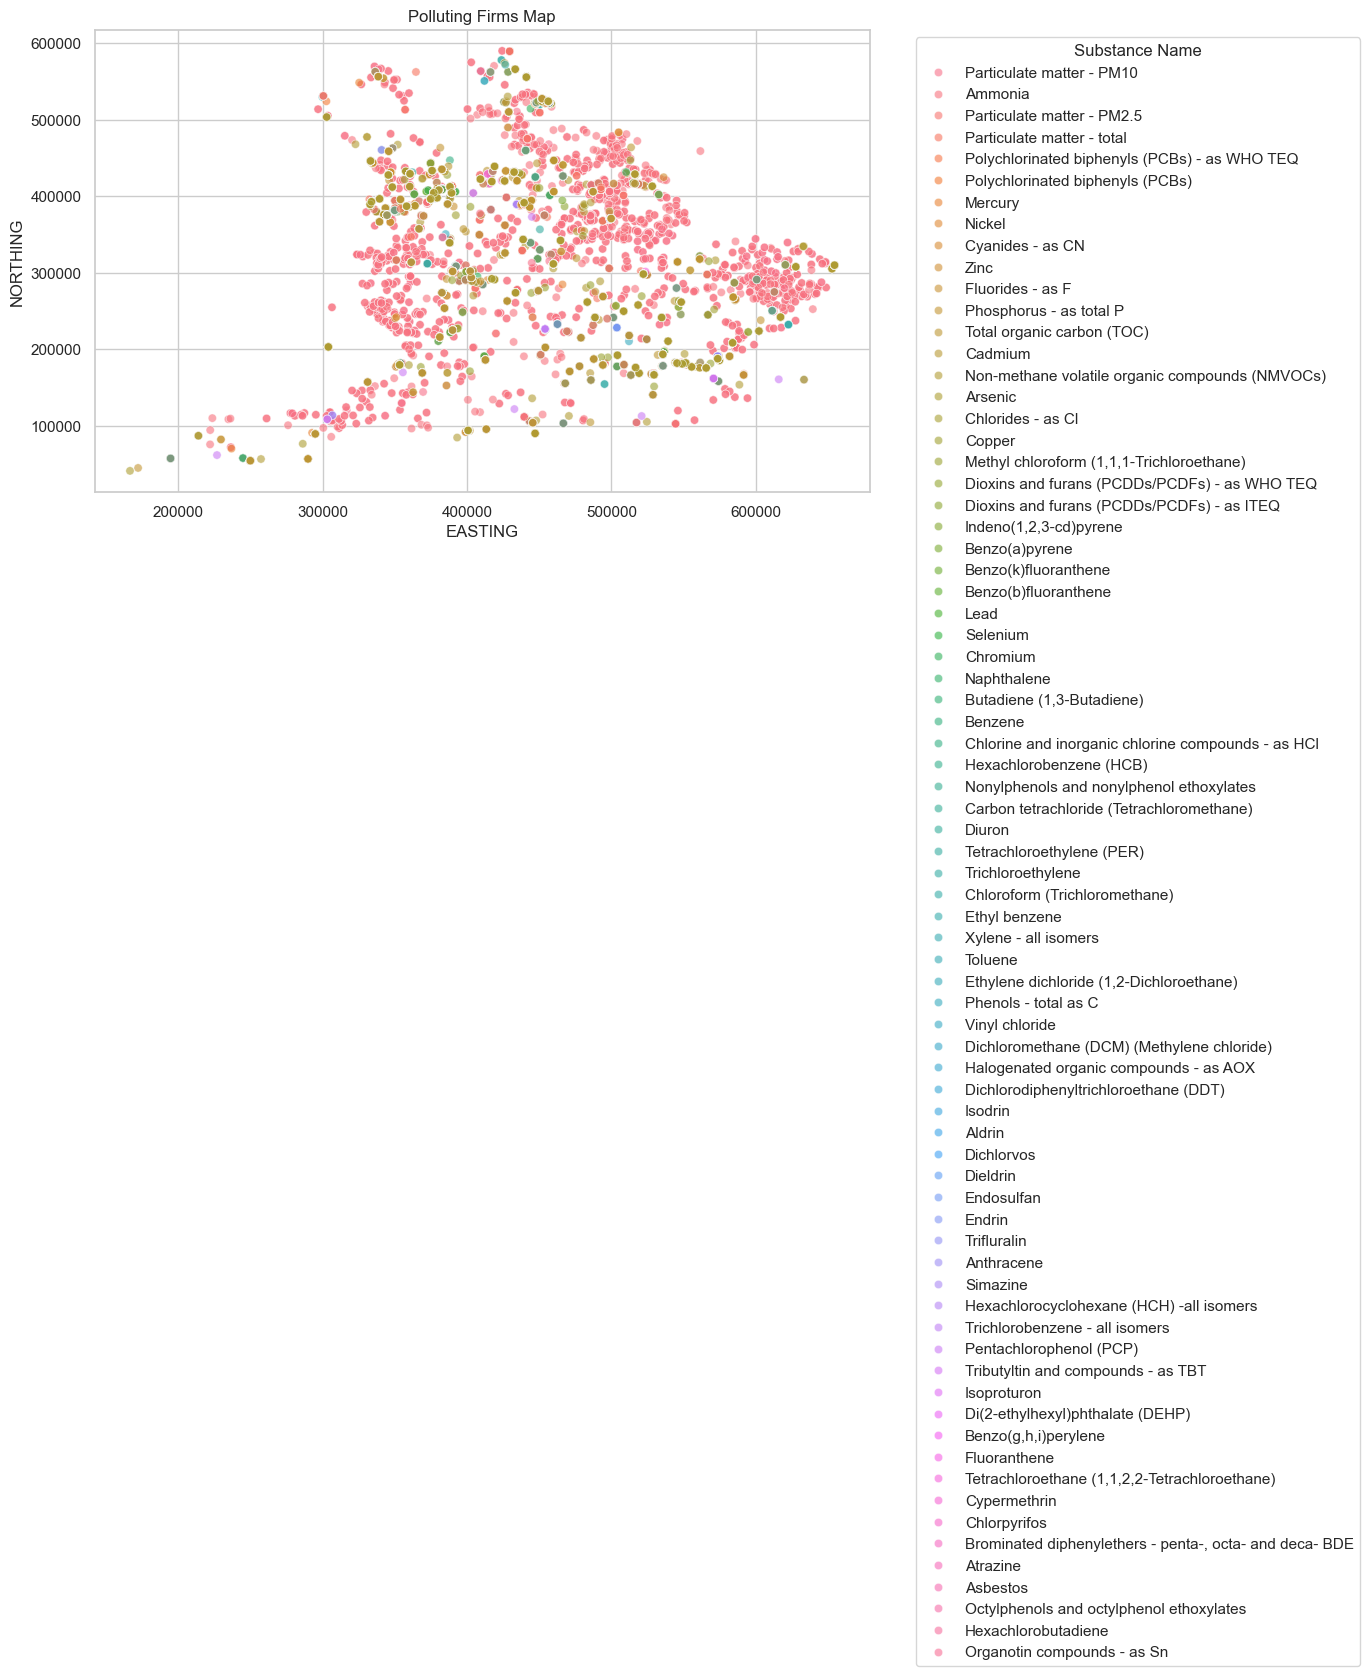

['agriculture' 'biowaste treatment' 'cement and minerals' 'chemicals'
 'combustion' 'efw' 'food & drink' 'waste treatment' 'landfill' 'metals'
 'no far sector' 'nuclear' 'oil and gas' 'paper and textiles'
 'refineries & fuel' 'water industry']
REGULATED INDUSTRY SECTOR
agriculture            1.478255e+07
biowaste treatment     3.877669e+05
cement and minerals    2.668461e+06
chemicals              3.595793e+08
combustion             2.388973e+08
efw                    3.231777e+06
food & drink           1.155401e+07
landfill               7.315907e+04
metals                 6.414997e+06
no far sector          4.494140e+05
nuclear                6.297500e+03
oil and gas            1.060000e+05
paper and textiles     1.671901e+06
refineries & fuel      1.492117e+07
waste treatment        1.253709e+06
water industry         4.414866e+08
Name: QUANTITY RELEASED (kg), dtype: float64


C:\Users\m1953\AppData\Local\Temp\ipykernel_15480\2126810119.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="REGULATED INDUSTRY SECTOR", y="QUANTITY RELEASED (kg)", data=df, estimator=np.sum, errorbar=None, palette="muted")


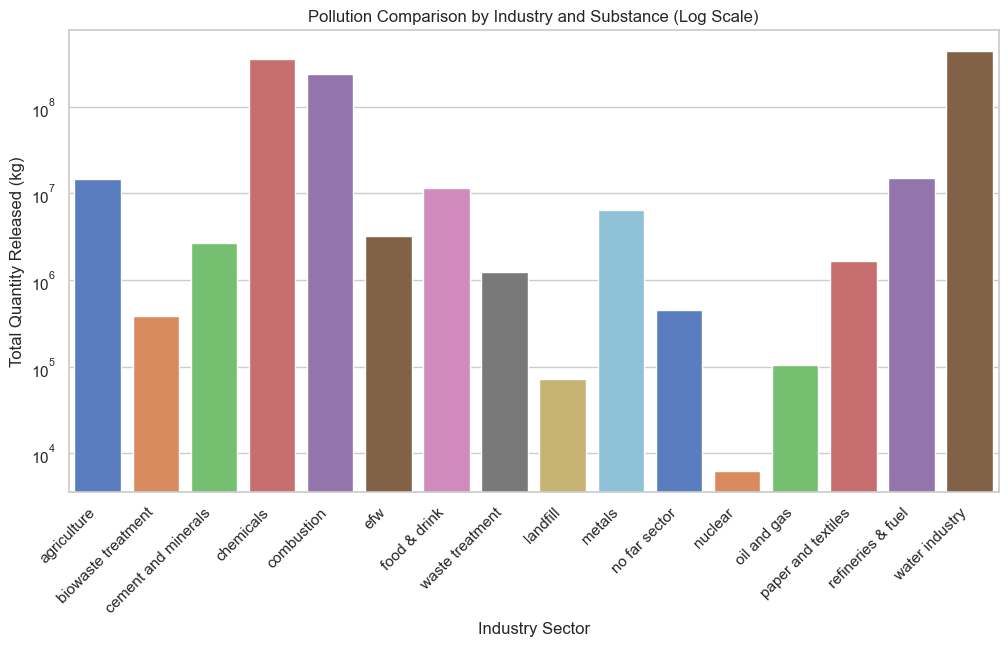

C:\Users\m1953\AppData\Local\Temp\ipykernel_15480\2126810119.py:81: FutureWarning: The provided callable <function sum at 0x0000023121365760> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = df.pivot_table(values="QUANTITY RELEASED (kg)", index="REGULATED INDUSTRY SECTOR", columns="SUBSTANCE NAME", aggfunc=np.sum, fill_value=0)


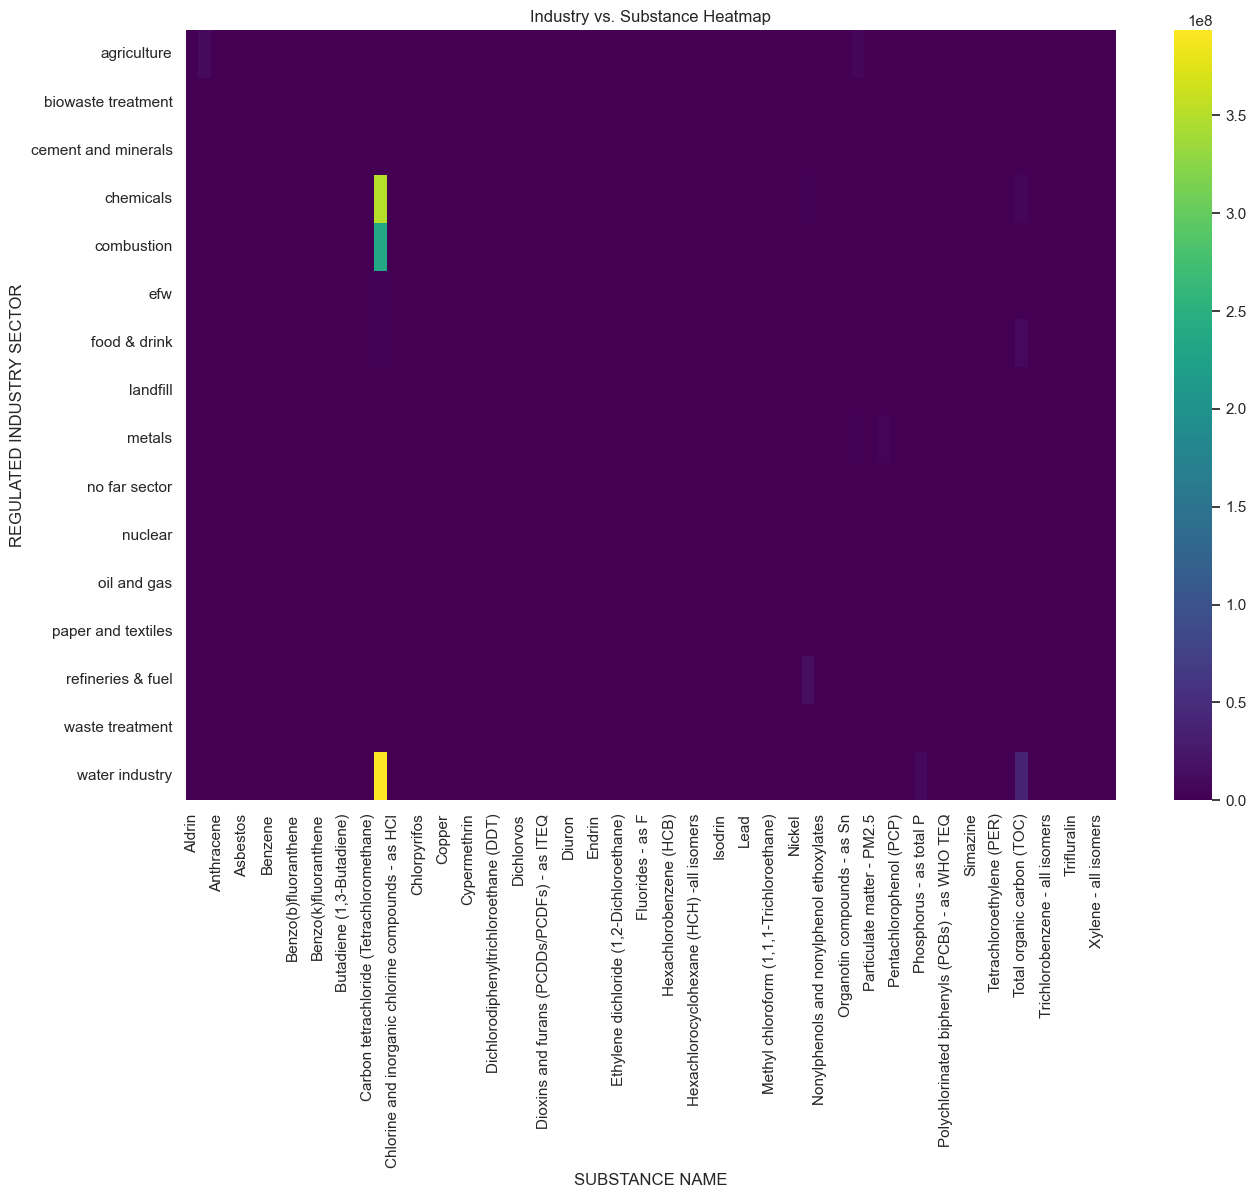

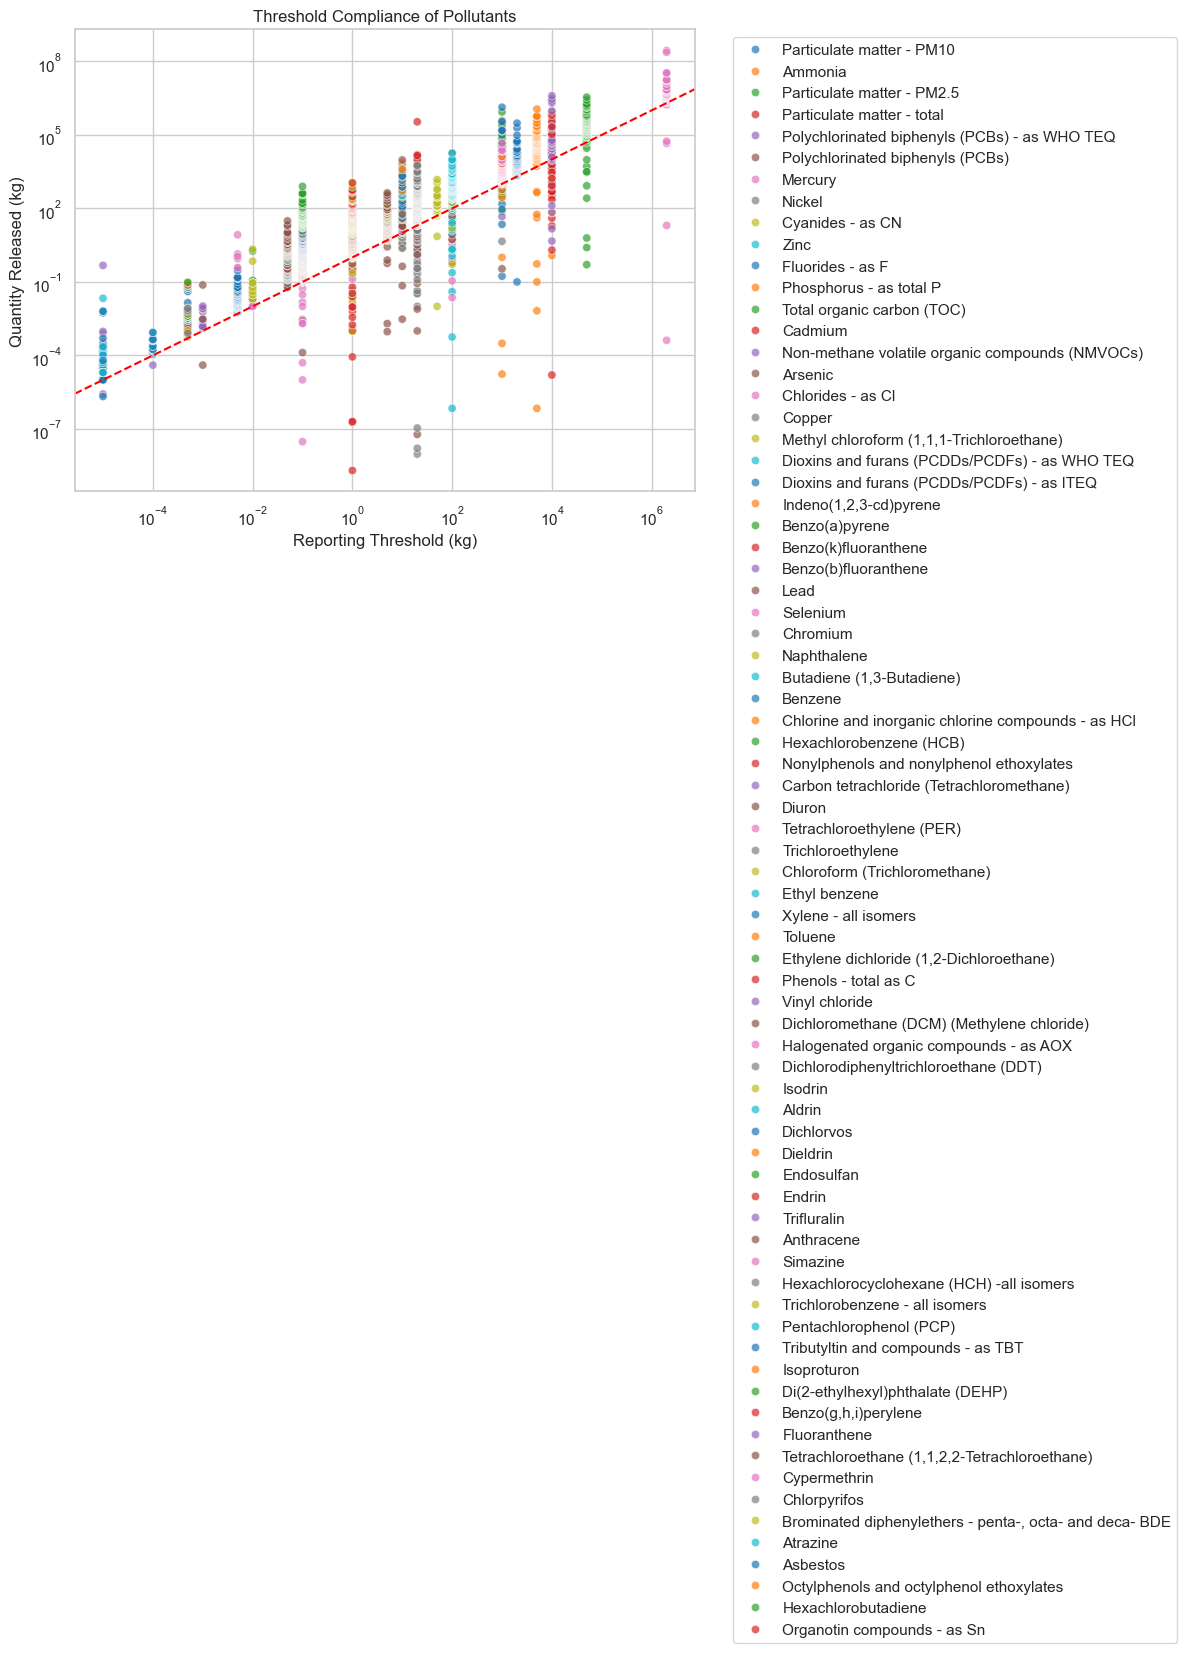

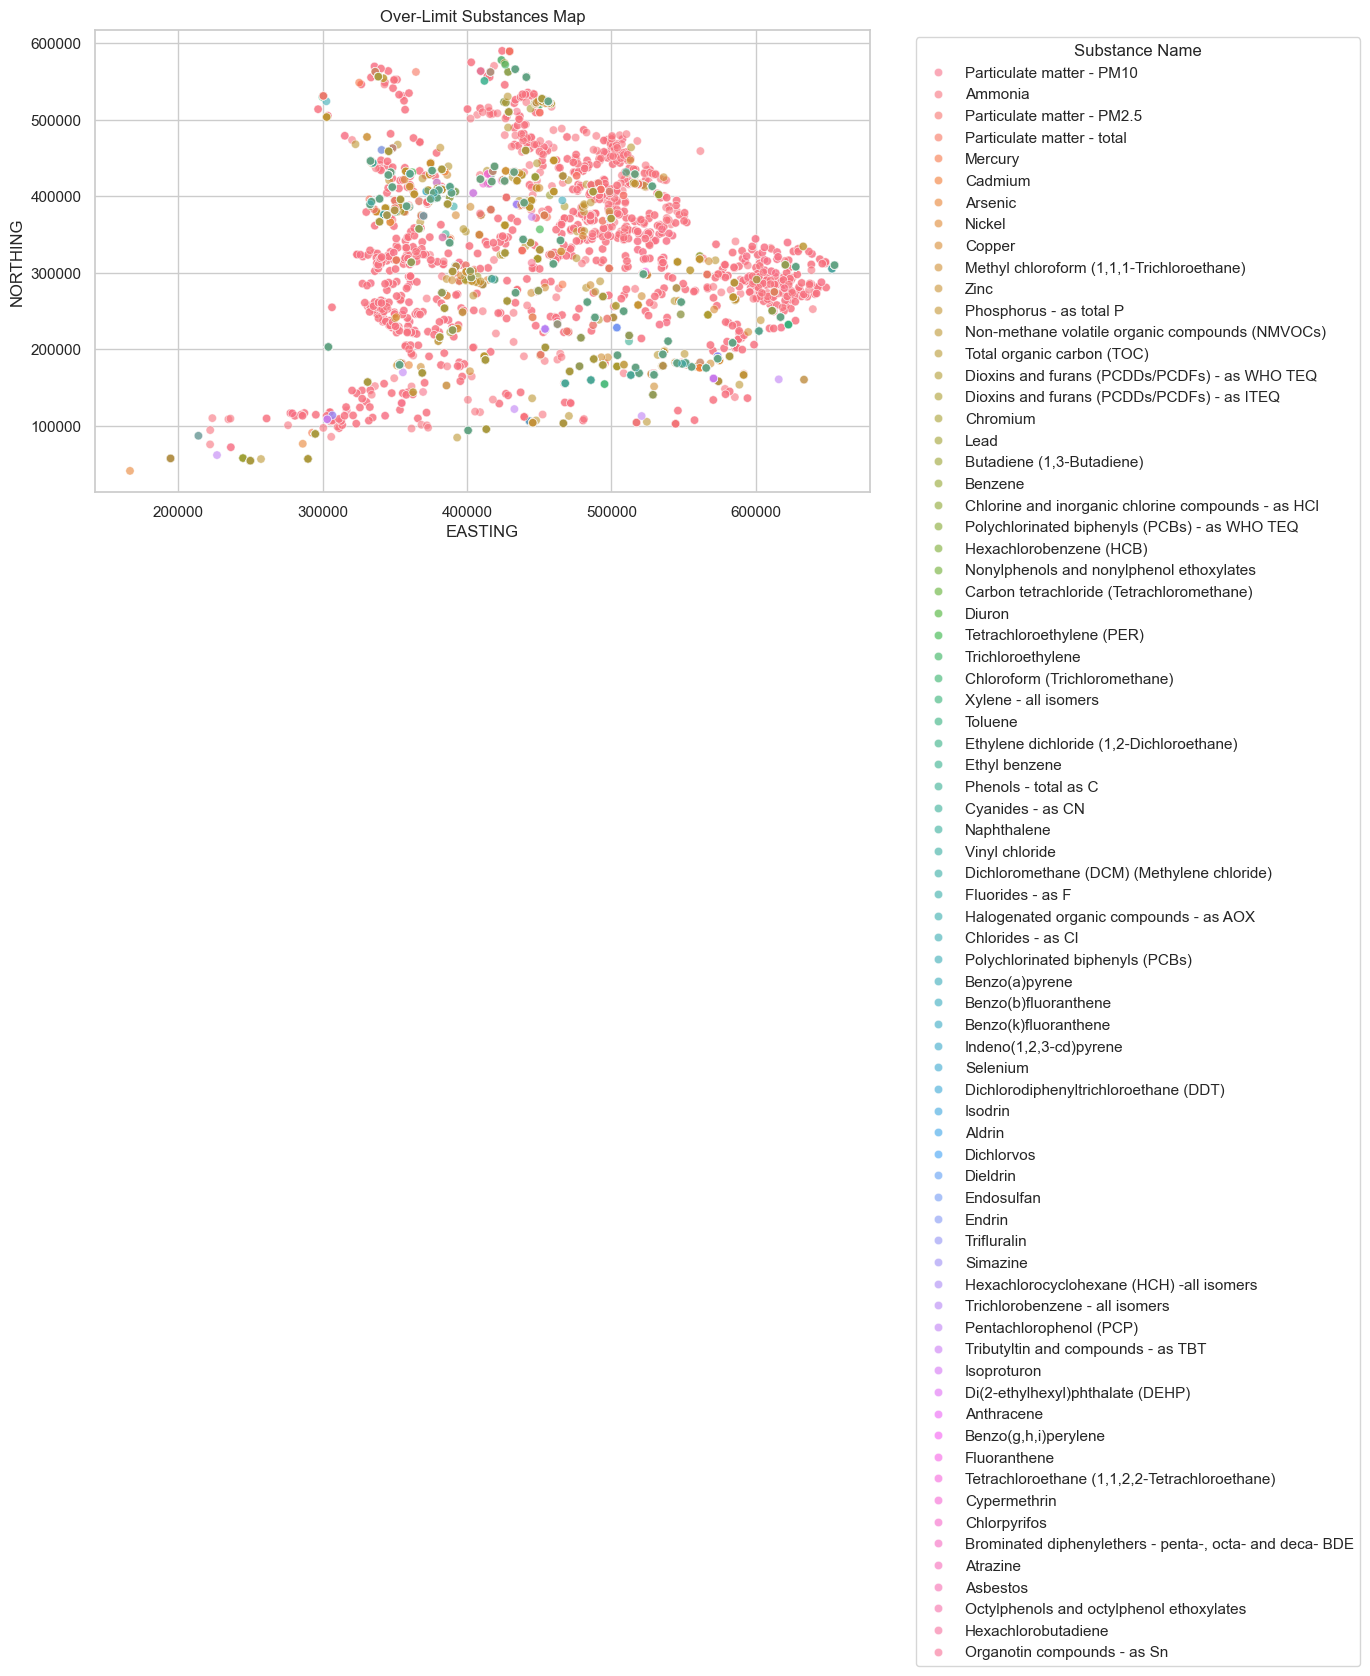

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np

# 加载数据
file_path = "C:\\Users\\m1953\\Downloads\\pollution_no_gas_cleaned.xlsx"  # 替换为你的文件路径
df = pd.read_excel(file_path)
xls = pd.ExcelFile(file_path)

# 统计不同物质的频数
substance_counts = df["SUBSTANCE NAME"].value_counts()

# 设置图表风格
sns.set_style("whitegrid")

# 创建柱状图
plt.figure(figsize=(10, 5))
sns.barplot(x=substance_counts.index[:10], y=substance_counts.values[:10], palette="Blues_r")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Substance Name")
plt.ylabel("Count")
plt.title("Top 10 Most Frequent Substances")
plt.show()

# 创建饼图（前10个物质）
plt.figure(figsize=(8, 8))
plt.pie(substance_counts.values[:10], labels=substance_counts.index[:10], autopct='%1.1f%%', 
        colors=sns.color_palette("pastel"), startangle=140)
plt.title("Proportion of Top 10 Substances")
plt.show()

# 2. 污染物的空间分布
# 2.1 地理热图（Geospatial Heatmap）
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["EASTING"], y=df["NORTHING"], hue=df["SUBSTANCE NAME"], alpha=0.6, palette="viridis")
plt.xlabel("EASTING")
plt.ylabel("NORTHING")
plt.title("Geospatial Distribution of Pollutants")
plt.legend(title="Substance Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2.2 污染企业分布地图（Polluting Firms Map）
plt.figure(figsize=(10, 6))
# 使用 EASTING 和 NORTHING
sns.scatterplot(x=df["EASTING"], y=df["NORTHING"], hue=df["SUBSTANCE NAME"], alpha=0.6)
plt.xlabel("EASTING")
plt.ylabel("NORTHING")
plt.title("Polluting Firms Map")
plt.legend(title="Substance Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. 污染物的行业影响
# 3.1 行业污染对比（Industry-Level Pollution Comparison）
# 行业污染对比
plt.figure(figsize=(12, 6))

# 添加调试信息
print(df["REGULATED INDUSTRY SECTOR"].unique())
print(df.groupby("REGULATED INDUSTRY SECTOR")["QUANTITY RELEASED (kg)"].sum())

# 简化代码，删除 hue 参数
ax = sns.barplot(x="REGULATED INDUSTRY SECTOR", y="QUANTITY RELEASED (kg)", data=df, estimator=np.sum, errorbar=None, palette="muted")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Industry Sector")
plt.ylabel("Total Quantity Released (kg)")
plt.title("Pollution Comparison by Industry and Substance (Log Scale)")

# 设置对数坐标轴
plt.yscale("log")

# 手动添加图例
# handles, labels = ax.get_legend_handles_labels()
# plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# 3.2 行业-污染物矩阵（Industry vs. Substance Heatmap）
# 行业-污染物矩阵
pivot_table = df.pivot_table(values="QUANTITY RELEASED (kg)", index="REGULATED INDUSTRY SECTOR", columns="SUBSTANCE NAME", aggfunc=np.sum, fill_value=0)
plt.figure(figsize=(15, 10))

# 调整颜色映射和数值范围
sns.heatmap(pivot_table, cmap="viridis", annot=False, vmin=0, vmax=pivot_table.max().max())
plt.title("Industry vs. Substance Heatmap")
plt.show()

# 4. 污染物的超标情况
# 4.1 污染物排放 vs. 监管阈值（Threshold Compliance Scatter Plot）
# 污染物排放 vs. 监管阈值
plt.figure(figsize=(8, 6))
sns.scatterplot(x="REPORTING THRESHOLD (kg)", y="QUANTITY RELEASED (kg)", hue="SUBSTANCE NAME", data=df, palette="tab10", alpha=0.7)
plt.axline((1, 1), slope=1, color="red", linestyle="--")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Reporting Threshold (kg)")
plt.ylabel("Quantity Released (kg)")
plt.title("Threshold Compliance of Pollutants")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4.2 超标污染物地理分布（Over-Limit Substances Map）
# 超标污染物地理分布（简化示例）
over_limit = df[df["QUANTITY RELEASED (kg)"] > df["REPORTING THRESHOLD (kg)"]]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=over_limit["EASTING"], y=over_limit["NORTHING"], hue=over_limit["SUBSTANCE NAME"], alpha=0.6)
plt.xlabel("EASTING")
plt.ylabel("NORTHING")
plt.title("Over-Limit Substances Map")
plt.legend(title="Substance Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()